# Real-Time Hand Gesture Recognition – Exploratory Data Analysis (EDA)

In this notebook, we explore the dataset used for training our gesture recognition model.
The goal is to understand the structure of the data, assess class balance, view image samples, and prepare for the preprocessing phase.

---

🎯 *Objectives:*
- Count the number of classes and images
- Visualize class distribution
- Inspect image samples and dimensions
- Propose recommendations for preprocessing

## Step 1: Importing Required Libraries

We start by importing the necessary libraries for image processing, visualization, and basic data analysis.

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2

## Step 2: Define Dataset Path

Here, we set the dataset path and list the class folders. Each folder corresponds to a gesture class.

In [16]:
data_path = "../data/Dataset"
categories = os.listdir(data_path)
print(categories)


['rock_on', 'rock', 'fingers_crossed', 'index_up', 'thumbs_up', 'scissor', 'spock', 'paper', 'okay', 'call_me']


✅ If the dataset loads successfully, we should see a list of 10 gesture class folders like rock, thumbs_up, etc.

## Step 3: Count Images per Class

Now, we count how many images are in each class folder.
To ensure accuracy, we only count .jpg images and ignore other file types like .identifier.

This gives us insight into class balance and dataset size.

In [17]:
class_counts = {}
for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):
        image_count = len([f for f in os.listdir(class_folder)if f.endswith('.jpg')])
        class_counts[class_name] = image_count

for label, count in class_counts.items():
    print(f"{label}: {count} images")

print(f"\nTotal images: {sum(class_counts.values())}")
print(f"Number of classes: {len(class_counts)}")

rock_on: 531 images
rock: 508 images
fingers_crossed: 504 images
index_up: 504 images
thumbs_up: 537 images
scissor: 527 images
spock: 526 images
paper: 539 images
okay: 540 images
call_me: 527 images

Total images: 5243
Number of classes: 10


✅ You should see 10 gesture classes. Each class contains around *520 .jpg images*, based on the official dataset description.

Note: If your dataset directory also contains .identifier files or other metadata files, make sure to exclude them when counting images.

The distribution of actual image files remains balanced across all classes, which is ideal for training.

## Step 4: Visualize Class Distribution

A bar chart shows how many images exist in each class.  
This helps us spot any imbalances visually.

If one class has significantly fewer samples, we may consider data augmentation later.

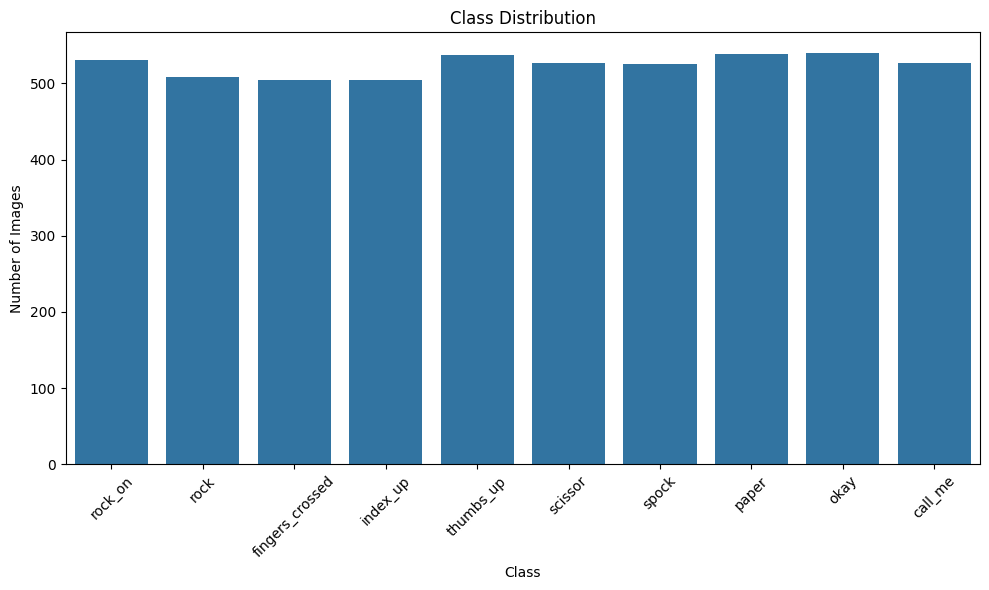

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ A roughly even bar height across all classes means our dataset is balanced

## Step 5: Display Sample Images per Class

We now display one sample image from each gesture class.
This helps verify:
- Image clarity
- Hand shape per class
- Background consistency

We'll convert images from BGR to RGB to display correctly in matplotlib.

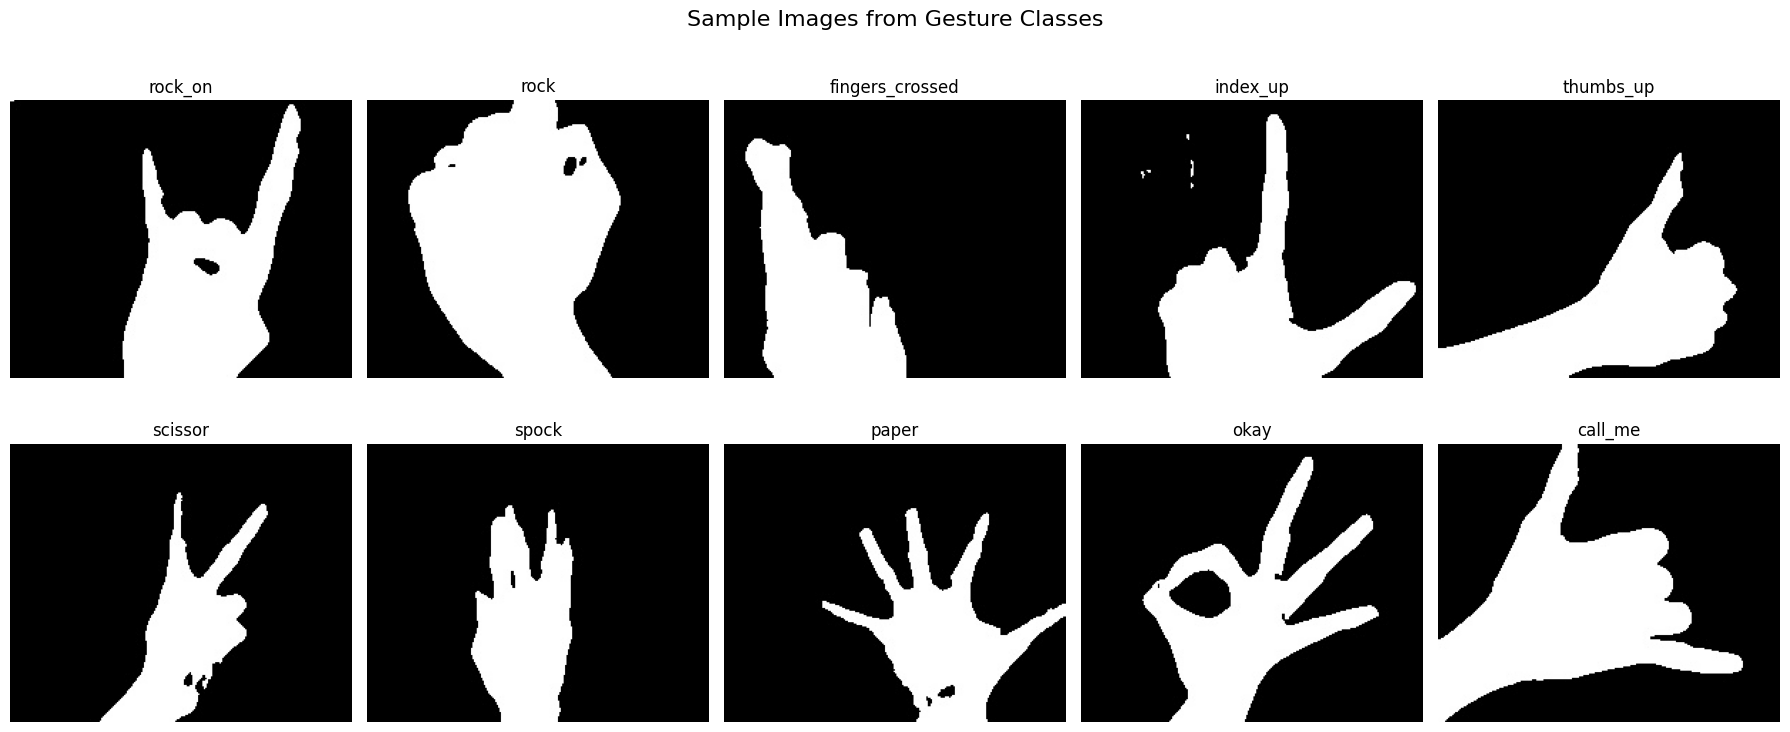

In [19]:
plt.figure(figsize=(18, 8))

for i, class_name in enumerate(class_counts.keys()):
    class_folder = os.path.join(data_path, class_name)
    image_list = os.listdir(class_folder)

    for image_name in image_list:
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            break

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Gesture Classes", fontsize=16)
plt.tight_layout()
plt.show()

✅ You should see 10 different hand gestures displayed clearly. This gives a visual confirmation of data quality

In [8]:
print("Shape:", image.shape)
print("Pixel value at center:", image[image.shape[0]//2][image.shape[1]//2])

Shape: (195, 240, 3)
Pixel value at center: [255 255 255]


## Step 6: Analyze Image Shapes

We inspect the image dimensions to ensure uniformity.  
If images vary in size, resizing will be necessary during preprocessing.

We also check the number of channels to determine if the images are grayscale or RGB.

In [ ]:
image_shapes = []


for class_name in list(class_counts.keys()):
    class_folder = os.path.join(data_path, class_name)
    image_name = os.listdir(class_folder)[0]
    image_path = os.path.join(class_folder, image_name)

    image = cv2.imread(image_path)
    if image is not None:
        image_shapes.append(image.shape)


unique_shapes = set(image_shapes)
print(f"Unique image shapes found: {unique_shapes}")

Unique image shapes found: {(195, 240, 3)}


✅ A single output like (195, 240, 3) means all images are the same size and use 3 color channels (RGB), even if they look black-and-white.

## Step 8: Summary & Preprocessing Recommendations

### ✅ Summary:
- 10 gesture classes
- ~1000 images per class (balanced dataset)
- All images are (195, 240, 3) – consistent and color-coded

---

### ⚙️ Preprocessing Recommendations:
- *Resize* images to a fixed shape (e.g., 128x128)
- *Convert to grayscale* to reduce complexity (since images are black-and-white)
- *Normalize* pixel values to [0, 1]
- *Split* into train/test sets before training

This concludes our EDA. We are now ready to proceed to the preprocessing phase.